In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
tvshows_df = pd.read_csv(r"D:\ML\Intro to ML Course\Week6\Assignment\n_movies.csv")

In [102]:
tvshows_df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [103]:
# Test if Squid Game exists
sub = ['Squid Game']
tv_df_filtered = tvshows_df[tv_df['title'].isin(sub)]
tv_df_filtered

,title,year,certificate,duration,genre,rating,description,stars,votes
45,Squid Game,(2021– ),TV-MA,55 min,"Action, Drama, Mystery",8.0,Hundreds of cash-strapped players accept a str...,"['Lee Jung-jae, ', 'Park Hae-soo, ', 'Hoyeon, ...","435,160"
9943,Squid Game,(2021– ),TV-MA,55 min,"Action, Drama, Mystery",8.0,Hundreds of cash-strapped players accept a str...,"['Lee Jung-jae, ', 'Park Hae-soo, ', 'Hoyeon, ...","435,164"


In [117]:
# Only work with specific columns for this test
sample_df = tvshows_df.drop(["year", "certificate", "duration", "description", "stars", "votes"], axis=1)

In [118]:
sample_df

,title,genre,rating
0,Cobra Kai,"Action, Comedy, Drama",8.5
1,The Crown,"Biography, Drama, History",8.7
2,Better Call Saul,"Crime, Drama",8.9
3,Devil in Ohio,"Drama, Horror, Mystery",5.9
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",8.6
...,...,...,...
9952,The Imperfects,"Action, Adventure, Drama",6.3
9953,The Walking Dead,"Drama, Horror, Thriller",8.1
9954,The Crown,"Biography, Drama, History",8.7
9955,Supernatural,"Drama, Fantasy, Horror",8.4


In [119]:
# Remove duplicates
sample_df = sample_df.drop_duplicates()

In [120]:
sample_df.head()

,title,genre,rating
0,Cobra Kai,"Action, Comedy, Drama",8.5
1,The Crown,"Biography, Drama, History",8.7
2,Better Call Saul,"Crime, Drama",8.9
3,Devil in Ohio,"Drama, Horror, Mystery",5.9
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",8.6


<Axes: >

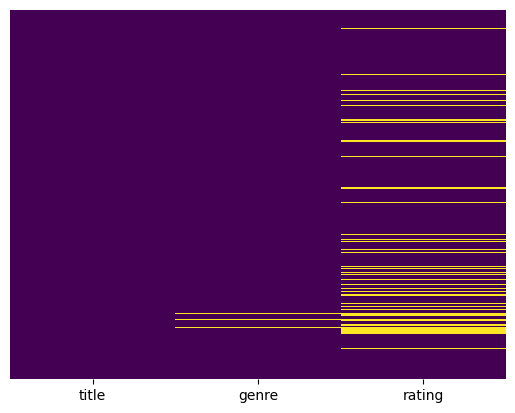

In [121]:
sns.heatmap(sample_df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [123]:
sample_df = sample_df.dropna(subset=['genre'])
sample_df = sample_df.dropna(subset=['rating'])

In [124]:
sample_df['genre_set'] = sample_df['genre'].apply(lambda x: set(x.split(',')))

In [125]:
sample_df.head()

,title,genre,rating,genre_set
0,Cobra Kai,"Action, Comedy, Drama",8.5,"{ Comedy, Drama, Action}"
1,The Crown,"Biography, Drama, History",8.7,"{Biography, Drama, History}"
2,Better Call Saul,"Crime, Drama",8.9,"{Crime, Drama}"
3,Devil in Ohio,"Drama, Horror, Mystery",5.9,"{ Horror, Mystery, Drama}"
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",8.6,"{ Adventure, Animation, Action}"


In [130]:
# Function to calculate genre similarity, secondary sort by rating
def calculate_similarity(title, df, top_n=8):
    # Find the genre of the input title
    input_genre = df.loc[df['title'] == title, 'genre_set'].values[0]
    
    # Calculate similarity (intersection size) with other titles
    df['similarity'] = df['genre_set'].apply(lambda x: len(input_genre & x))
    
    # Exclude the input title
    recommendations = df[df['title'] != title]
    
    # Sort by similarity (primary) and rating (secondary)
    recommendations = recommendations.sort_values(by=['similarity', 'rating'], ascending=[False, False])
    
    # Return top N recommendations
    return recommendations[['title', 'genre', 'rating', 'similarity']].head(top_n)

In [131]:
recommendations = calculate_similarity("Squid Game", sample_df)
print(recommendations)

                    title                   genre  rating  similarity
235          Little Women  Action, Drama, Mystery     8.6           3
872             Torchwood  Action, Drama, Mystery     7.7           3
467   Alice in Borderland  Action, Drama, Mystery     7.6           3
249   Designated Survivor  Action, Drama, Mystery     7.5           3
2369   The Good Detective  Action, Drama, Mystery     7.5           3
1221   The Rhythm Section  Action, Drama, Mystery     5.4           3
761           How It Ends  Action, Drama, Mystery     5.0           3
8259               Dexter   Crime, Drama, Mystery     9.6           2
